<a href="https://colab.research.google.com/github/jnrkufuor/apollo/blob/Ernest/notebooks/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load Packagaes

In [1]:
!pip install squarify

import pandas as pd
import numpy as np
import math
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from google.colab import drive
drive.mount('/content/drive')

tqdm.pandas()

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


2. Load data

In [2]:
df_articles =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/googlenews1000.csv')

df_links = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_links_att1.csv')
print(len(df_links.index))
df_articles['datetime'] = pd.to_datetime(df_articles['datetime'])

1032368


3. Subset data

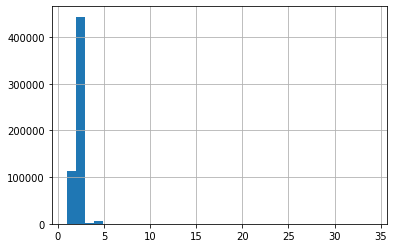

In [3]:
date = '2020-03-26'

#df_links = df_links[df_links['date']==date]
df_links = df_links.groupby(['from', 'to']).size().reset_index()
df_links.rename(columns={0: 'count'}, inplace=True)
#df_links = df_links[df_links['count'] > 1] #uncomment if necessary
df_links.reset_index(drop=True, inplace=True)
df_links['weight'] = df_links['count']
df_links['weight'].hist(bins=max(df_links['weight']))

In [4]:
df_links[['from', 'to', 'weight']].sort_values('weight', ascending=False).head(10)

,from,to,weight
238954,Equitiescom,QuoteMedia,34
238858,Equitiescom,Equitiescom Newsdesk,34
239091,Equitiescom Newsdesk,QuoteMedia,34
193954,DJIA,QuoteMedia,19
216404,Dow Jones Industrial Average,Equitiescom Newsdesk,19
193888,DJIA,Equitiescom Newsdesk,19
193887,DJIA,Equitiescom,19
193883,DJIA,Dow Jones Industrial Average,19
225308,ETH,Ethereum,19
60586,BTC,Bitcoin,19


4. Plot Edges

In [5]:
# df_plot = df_links.sort_values('weight', ascending=False).head(150)
df_plot = df_links[df_links['weight']>6]
df_plot.reset_index(inplace=True, drop=True)

G_plot = nx.Graph()

for link in tqdm(df_plot.index):
  G_plot.add_edge(df_plot.iloc[link]['from'],
             df_plot.iloc[link]['to'],
             weight=df_plot.iloc[link]['weight'])

100%|██████████| 215/215 [00:00<00:00, 1911.23it/s]


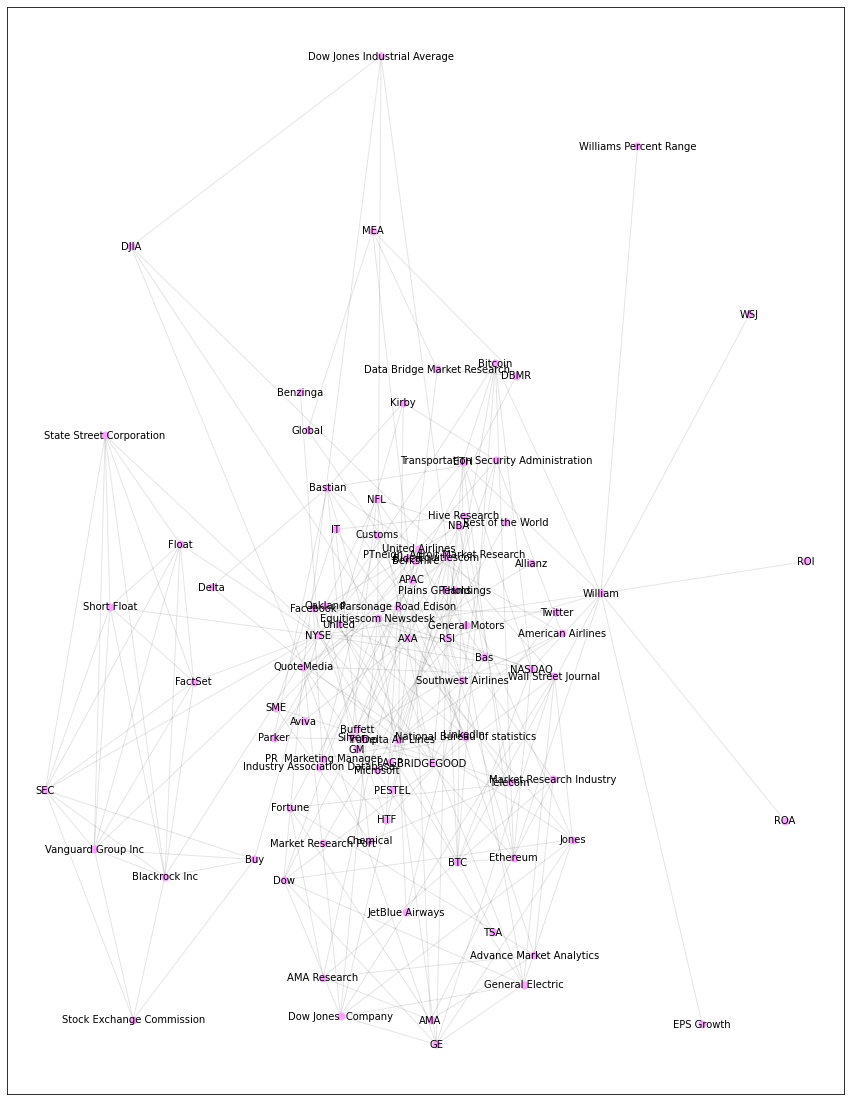

In [7]:
pos = nx.kamada_kawai_layout(G_plot)
nodes = G_plot.nodes()
fig, axs = plt.subplots(1, 1, figsize=(15,20))

el = nx.draw_networkx_edges(G_plot, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G_plot, pos, nodelist=nodes, node_color='#FAA6FF', 
                            node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G_plot, pos, font_size=10, font_family='sans-serif')